In [1]:
import pandas as pd
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv"
df=pd.read_csv(url)

In [2]:
x=df["horsepower"]
y=df["mpg"]

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [7]:
df.shape

(398, 9)

In [18]:
df=df.dropna(subset=['horsepower'])

In [19]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

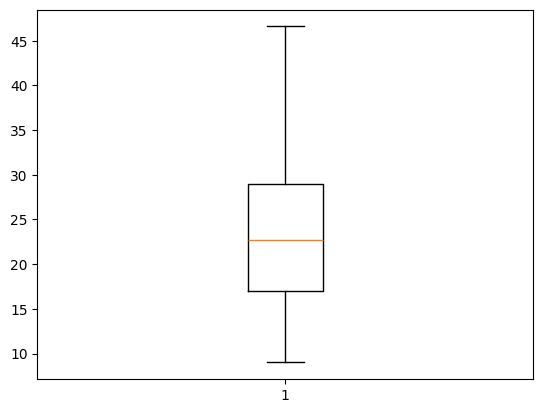

In [20]:
import matplotlib.pyplot as plt
plt.boxplot(df['mpg'])
plt.show()

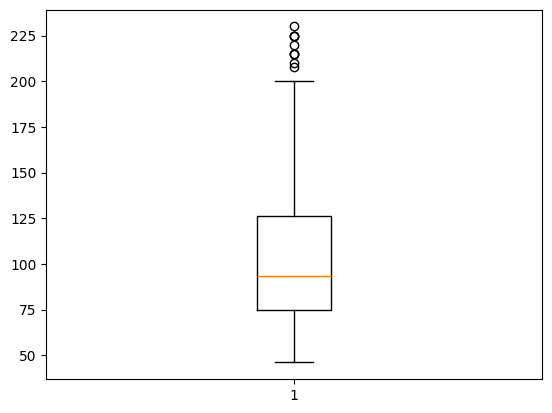

In [21]:
plt.boxplot(df['horsepower'])
plt.show()

In [22]:
Q1 = df['horsepower'].quantile(0.25)
Q3 = df['horsepower'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['horsepower'] < Q1 - 1.5*IQR) | (df['horsepower'] > Q3 + 1.5*IQR)]
outliers

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
13,14.0,8,455.0,225.0,3086,10.0,70,usa,buick estate wagon (sw)
25,10.0,8,360.0,215.0,4615,14.0,70,usa,ford f250
27,11.0,8,318.0,210.0,4382,13.5,70,usa,dodge d200
67,11.0,8,429.0,208.0,4633,11.0,72,usa,mercury marquis
94,13.0,8,440.0,215.0,4735,11.0,73,usa,chrysler new yorker brougham
95,12.0,8,455.0,225.0,4951,11.0,73,usa,buick electra 225 custom
116,16.0,8,400.0,230.0,4278,9.5,73,usa,pontiac grand prix


In [25]:
Q1 = df['mpg'].quantile(0.25)
Q3 = df['mpg'].quantile(0.75)
IQR = Q3 - Q1

outlier = df[(df['mpg'] < Q1 - 1.5*IQR) | (df['mpg'] > Q3 + 1.5*IQR)]
outlier

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name


In [26]:
df_clean = df.drop(outliers.index)
print(df_clean.shape)

(392, 9)


slope(w): -0.15784473335365362
intercept(b): 40.00451551814514


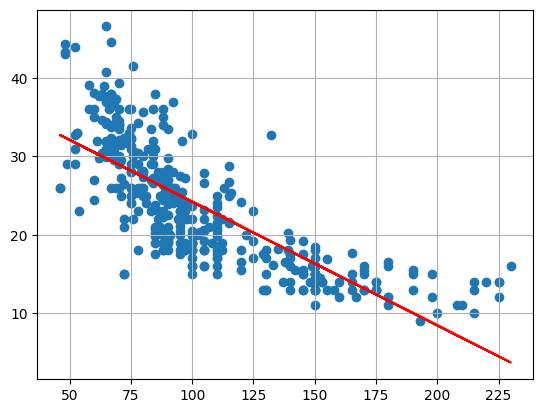

In [27]:
import numpy as np
import matplotlib.pyplot as plt

y_mean=np.mean(y)
x_mean=np.mean(x)

numerator=np.sum((x-x_mean)*(y-y_mean))
denominator=np.sum((x-x_mean)**2)

w=numerator/denominator
b=y_mean-w*x_mean

y_pred=w*x+b

print("slope(w):",w)
print("intercept(b):",b)

plt.scatter(x,y)
plt.plot(x,y_pred,color='red')
plt.grid(True)
plt.show()

In [33]:
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()
x = df[['horsepower']]
y = df['mpg']
model.fit(x,y)

print("intercept", model.intercept_)
print("slope:", model.coef_[0])



intercept 39.93586102117047
slope: -0.15784473335365365
